#toy problem
we tried this before real development to practise

in linear regression,
the hypothesis would be:

**$$y=\sum_{i=0}^{n} w_{i}x_{i}$$**

$$where \space \space x_{0}=1$$

and $$x_{1},x_{2},...,x_{n} \space \space are \space \space inputs/features$$ 
and $$y \space is \space the \space output.$$

1.000981048377973 1.0001754667235696


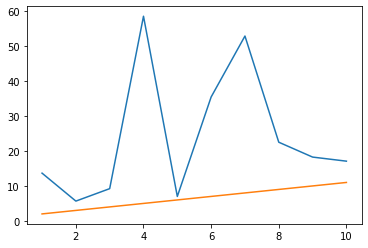

'\nthe lesson learned was that it overflows in gradient descent,when numbers are big.\n'

In [5]:
#trying y=ax+b for a generated data set as a practise.
import numpy as np
import matplotlib.pyplot as plt

no_of_iterations=10000
no_of_samples=10

#generating data
inputs = np.array([x for x in range(1,no_of_samples+1)])
outputs=inputs + (np.random.random((no_of_samples,))*20)**1.4

#our model is outputs = weight * inputs +outputs
weight=1
bias=1
learing_rate=0.0000000001

predictions=weight*inputs+bias
#applying gradient descent
for i in range(no_of_iterations):
    predictions=(weight*inputs+bias)
    weight-=learing_rate*np.sum((predictions-outputs)*inputs)
    bias-=learing_rate*np.sum((predictions-outputs))

print(weight,bias)
plt.plot(inputs,outputs)
plt.plot(inputs,predictions)
plt.show()


"""
the lesson learned was that it overflows in gradient descent,when numbers are big.
"""

**doing the same using normal equation from linear algebra**

***

In [6]:
inputs=inputs.reshape(no_of_samples,1)

In [7]:
arr=np.ones((no_of_samples,2))
arr[:,:-1]=inputs
arr


array([[ 1.,  1.],
       [ 2.,  1.],
       [ 3.,  1.],
       [ 4.,  1.],
       [ 5.,  1.],
       [ 6.,  1.],
       [ 7.,  1.],
       [ 8.,  1.],
       [ 9.,  1.],
       [10.,  1.]])

In [8]:
outputs=outputs.reshape(no_of_samples,1)

In [13]:
weights_learned=np.matmul(np.matmul(np.linalg.inv(np.matmul(arr.T,arr)),arr.T),outputs)
weights_learned

array([[ 1.19420443],
       [17.48133353]])

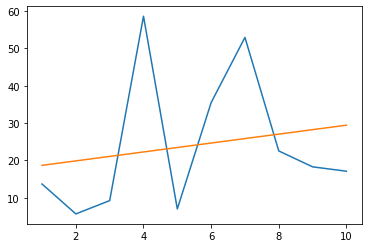

In [10]:
plt.plot(inputs,outputs)
plt.plot(inputs,inputs*weights_learned[0,0]+weights_learned[1,0])

#general multivariate regression

in linear regression,
the hypothesis would be:

**$$y=\sum_{i=0}^{n} w_{i}x_{i}$$**

$$where \space \space x_{0}=1$$

and $$x_{1},x_{2},...,x_{n} \space \space are \space \space inputs/features$$ 
and $$y \space is \space the \space output.$$

we can convert any polynomial regression problem into a linear regression problem in data preprocessing part

##data preprocessing

errors types encountered

shape of arrays not compatible for multiplication of matrices

In [120]:
import pandas as pd
df=pd.read_csv("mobile.csv")
data=df.values
outputs=data[:,-1].reshape((341,1))
data=data[:,:-1]
data=(data-np.mean(data,axis=0))/(np.std(data,axis=0)+0.001)
inputs=data
inputs.shape,outputs.shape

 #at the end we want inputs matrix and outputs vector such that inputs X weights = outputs
#inputs=
#outputs=


((341, 87), (341, 1))

##solve using gradient descent

In [121]:
#A is the inputs matrix and Y is is outputs vector such that AX=Y
A=inputs
Y=outputs
A.shape,Y.shape

((341, 87), (341, 1))

In [131]:
#hyperparameters

no_of_iterations=100000

no_of_samples=A.shape[0]

learing_rate=0.001/no_of_samples

#initial weights
weights=np.random.rand(A.shape[1],1)


In [132]:
#calculating gradients
#gradient vector=(predicted_outputs_vector-real_outputs_vector) transposed and multiplied by inputs matrix
#predicted output vector is AX and real/expected output vector is Y

def derivative(A,Y):

    temp1=np.matmul(A,weights)

    temp2=(temp1-Y)

    temp3=np.matmul(np.transpose(temp2),A)
    
    return np.transpose(temp3)

In [133]:
#gradient descent in action
error=[]
for i in range(no_of_iterations):
    error.append(np.sum((Y-np.matmul(A,weights))**2)/no_of_samples)
    weights-=learing_rate*derivative(A,Y)

In [ ]:
#i can keep track of minimum error also in case i need best one,though i skipped it for now
weights

##solve using normal equation

solution from linear algebra would be

$$given \space AX=B$$
$$then \space X=(A^TA)^{-1}A^TB$$

it is called normal equation

In [136]:
import numpy as np

In [144]:
def solution(A,B):

    '''
             AX=B

    A is a numpy matrix of inputs
    B is a numpy array of outputs

    output is a numpy array for weights/parameters

    IT WOULD GIVE ERROR IF MATRIX IS NOT INVERTIBLE

    '''

    A_transpose = np.transpose(A)

    temp1 = np.matmul(A_transpose,A)

    # temp2 = np.linalg.inv(temp1)
    temp2=np.linalg.pinv(temp1)#pseudoinverse

    temp3 = np.matmul(temp2,A_transpose)

    result=np.matmul(temp3,B)

    return result

In [145]:
normal_weights=solution(inputs,outputs)

##error visualization

for gradient descent

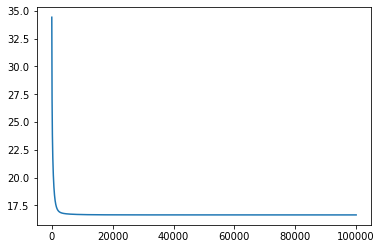

In [134]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(len(error)),error)
plt.show()

comparing normal and gradient descent results

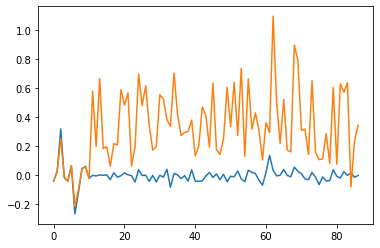

In [139]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(weights)),normal_weights)
plt.plot(np.arange(len(weights)),weights)
plt.show()